In [60]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

from pytesis.datasets import (
    arc,
    eyeglasses,
    filled_circle,
    add_noise,
    add_outliers
)
from pytesis.results import run_all_intervals, run_all
from pytesis.utils import compose

from functools import partial

# Circulo

In [61]:
n = 500
sd = 0.075
iqr_factor = 0.3
outliers_frac = 0.02
B = 30
robust_quantile = 0.97

## Base

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,100.0
Fermat,1,30,100.0
KDE,1,30,100.0


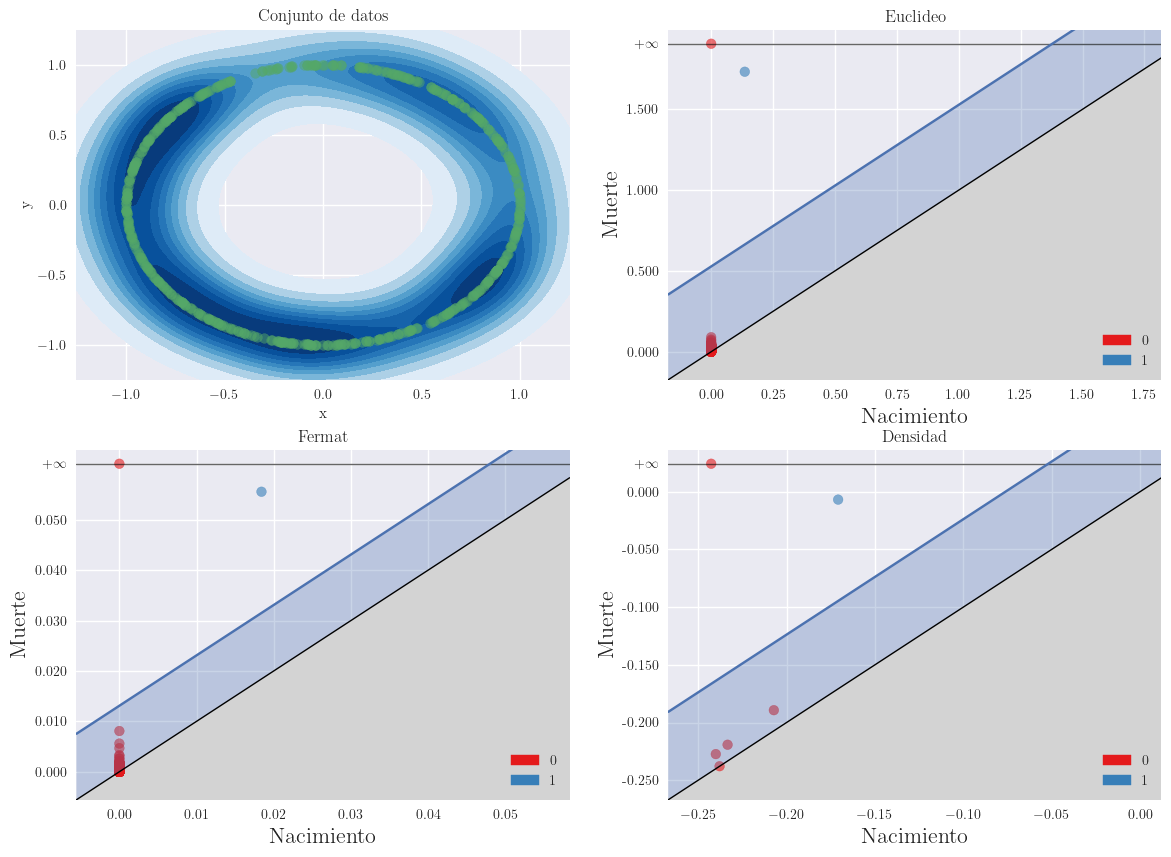

In [62]:
circle_factory = partial(arc, n=n)
circle_results = run_all(circle_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_results.powers

## Ruido

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,100.0
Fermat,1,30,100.0
KDE,1,30,100.0


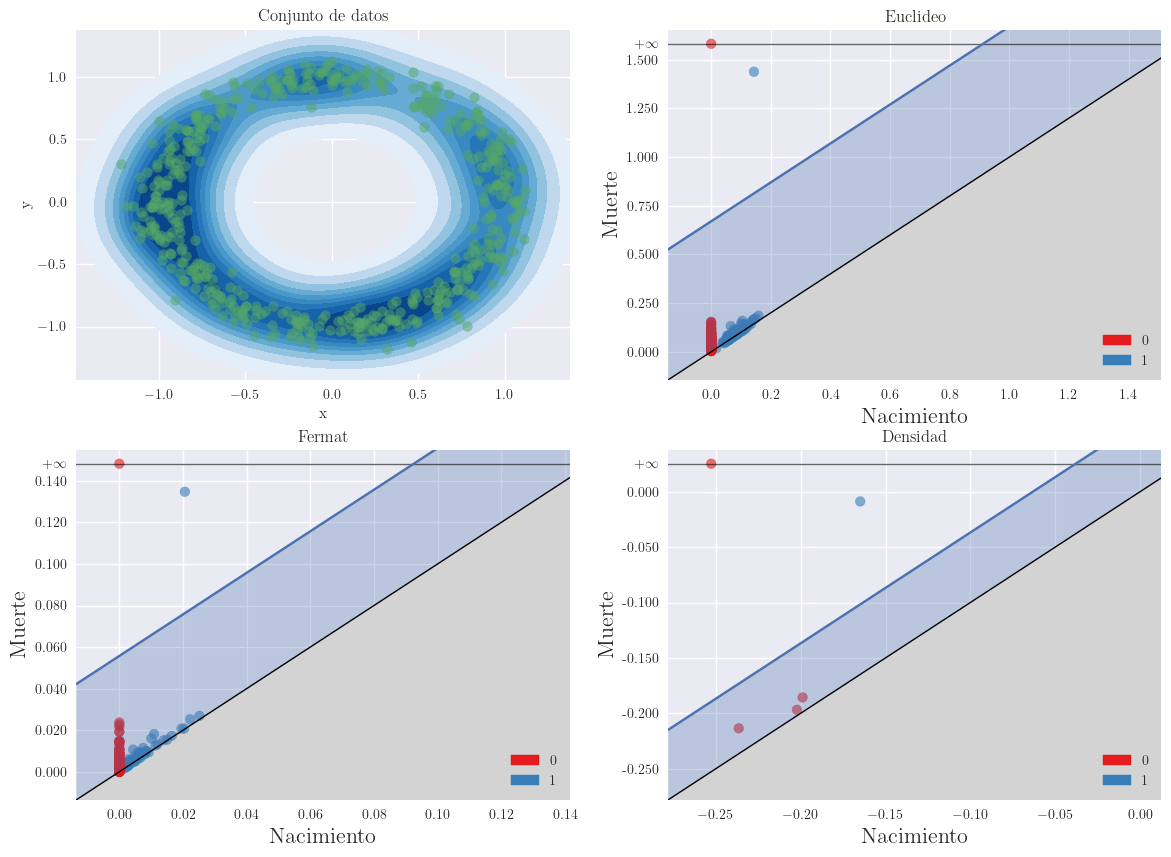

In [63]:
circle_noise_factory = compose(partial(add_noise, sd=sd), partial(arc, n=n))
circle_noise_results = run_all(circle_noise_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_noise_results.powers

## Outliers

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 1                    30     100.000000
         2                     0       0.000000
Fermat   1                    29      96.666667
         2                     1       3.333333
KDE      1                    30     100.000000
         2                     0       0.000000

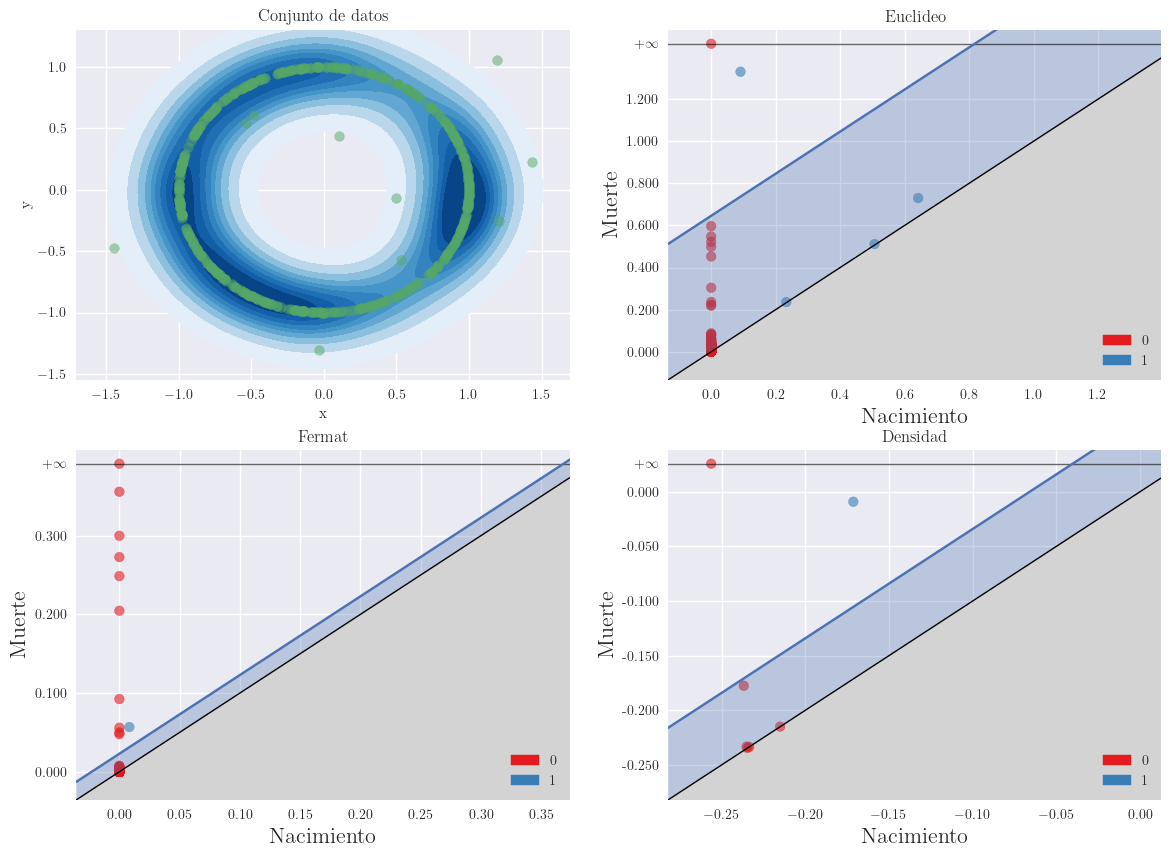

In [64]:
circle_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    partial(arc, n=n)
)
circle_outliers_results = run_all(circle_outliers_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_outliers_results.powers

# Circulo Gaussiano

In [65]:
# n = 500
# sd = 0.075
# iqr_factor = 0.2
# outliers_frac = 0.05
# B = 30

## Base

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,100.0
Fermat,1,30,100.0
KDE,1,30,100.0


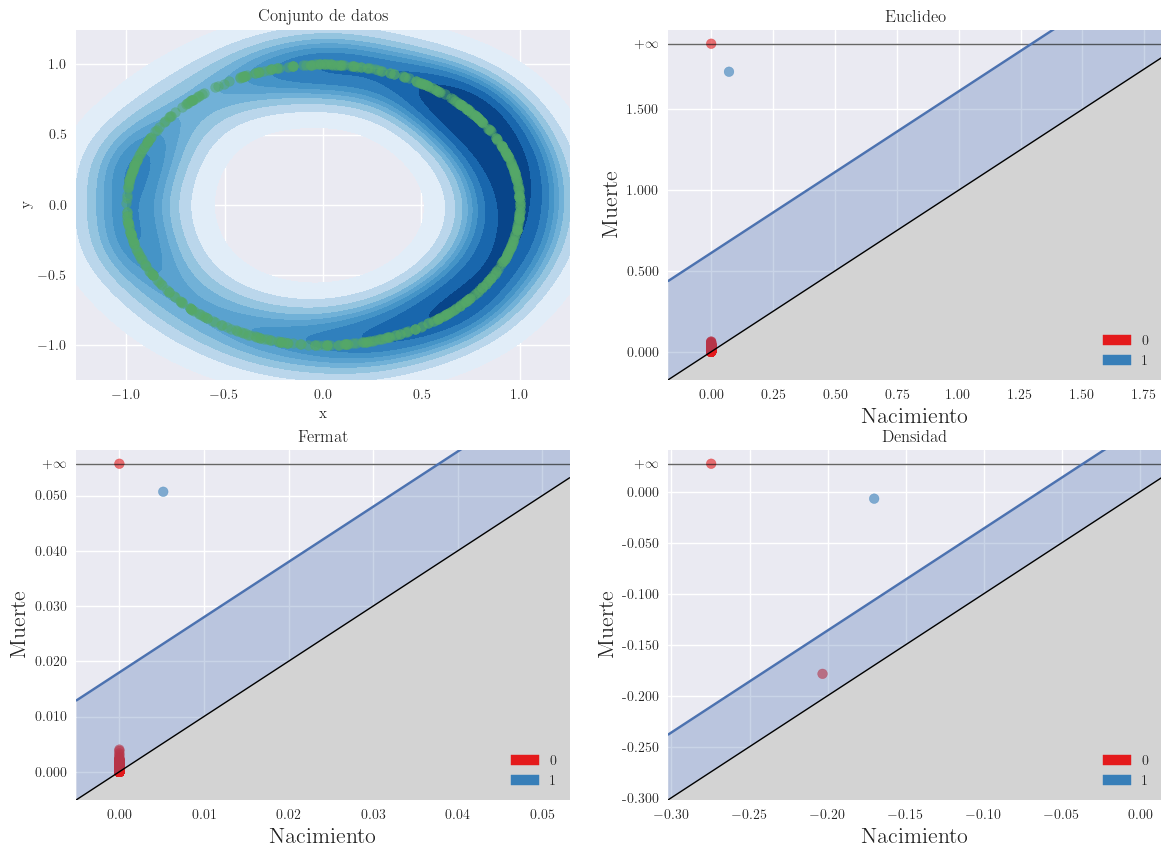

In [66]:
circle_gauss_factory = partial(arc, n=n, sampling="normal")
circle_gauss_results = run_all(circle_gauss_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_gauss_results.powers

## Ruido

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,100.0
Fermat,1,30,100.0
KDE,1,30,100.0


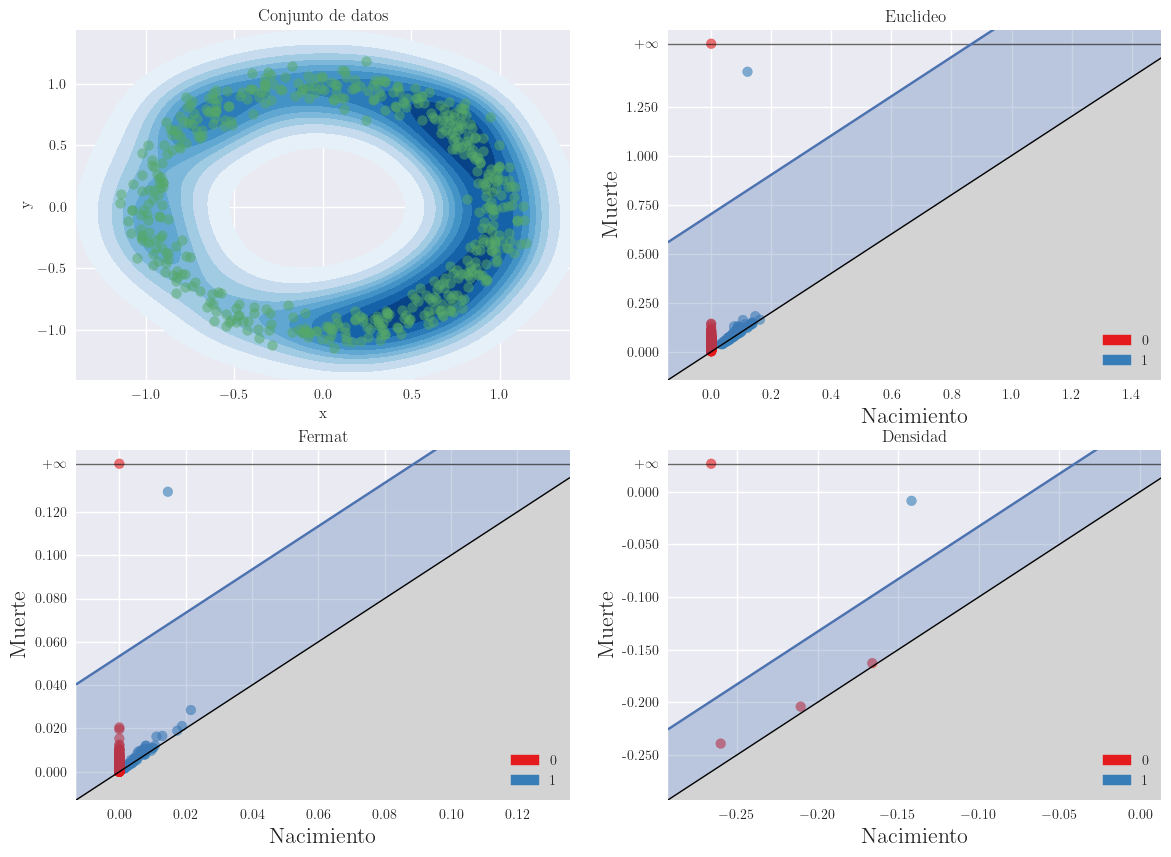

In [67]:
circle_gauss_noise_factory = compose(partial(add_noise, sd=sd), circle_gauss_factory)
circle_gauss_noise_results = run_all(circle_gauss_noise_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_gauss_noise_results.powers

## Outliers

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 1                    30     100.000000
         2                     0       0.000000
Fermat   1                    29      96.666667
         2                     1       3.333333
KDE      1                    30     100.000000
         2                     0       0.000000

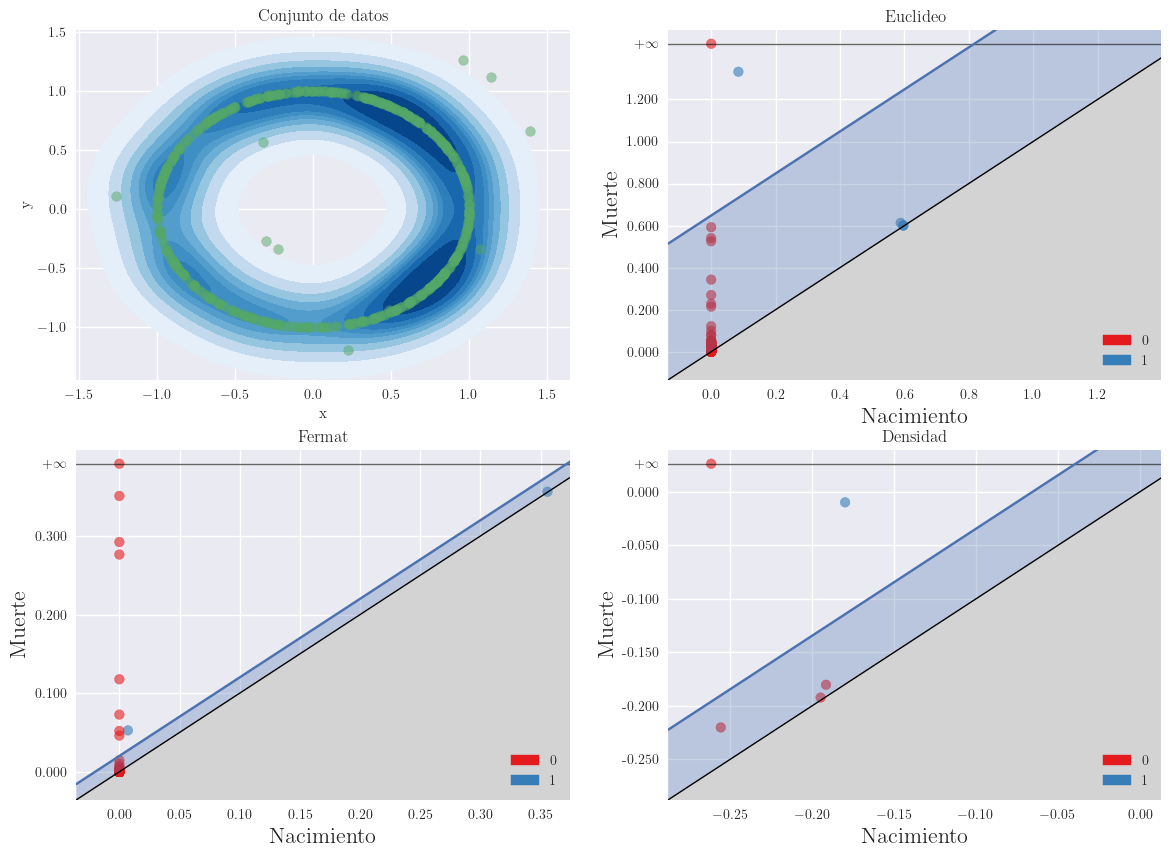

In [68]:
circle_gauss_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    circle_gauss_factory
)
circle_gauss_outliers_results = run_all(circle_gauss_outliers_factory, h=0.3, B_power=B, robust_quantile=robust_quantile)
circle_gauss_outliers_results.powers

# Eyeglasses

In [69]:
n = 750
bridge_height = 0.5
sd = 0.04
h = 0.20
B = 30

## Base

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 1                     0       0.000000
         2                    30     100.000000
Fermat   1                    30     100.000000
         2                     0       0.000000
KDE      1                     1       3.333333
         2                    29      96.666667

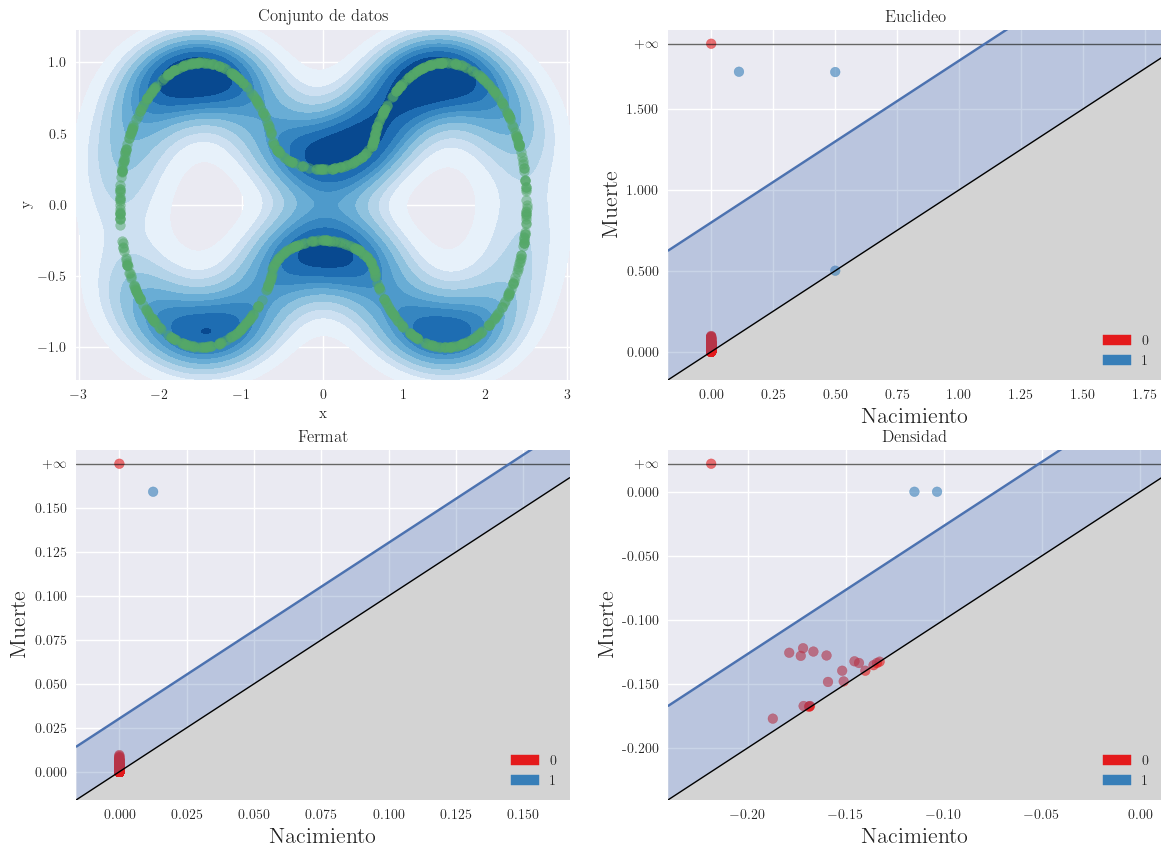

In [70]:
eyeglasses_factory = partial(eyeglasses, n=n, bridge_height=bridge_height)
eyeglasses_results = run_all(eyeglasses_factory, h=h, B_power=B, robust_quantile=robust_quantile)
eyeglasses_results.powers

## Ruido

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                     0       0.000000
         1                     0       0.000000
         2                    30     100.000000
Fermat   0                     0       0.000000
         1                    23      76.666667
         2                     7      23.333333
KDE      0                     1       3.333333
         1                     2       6.666667
         2                    27      90.000000

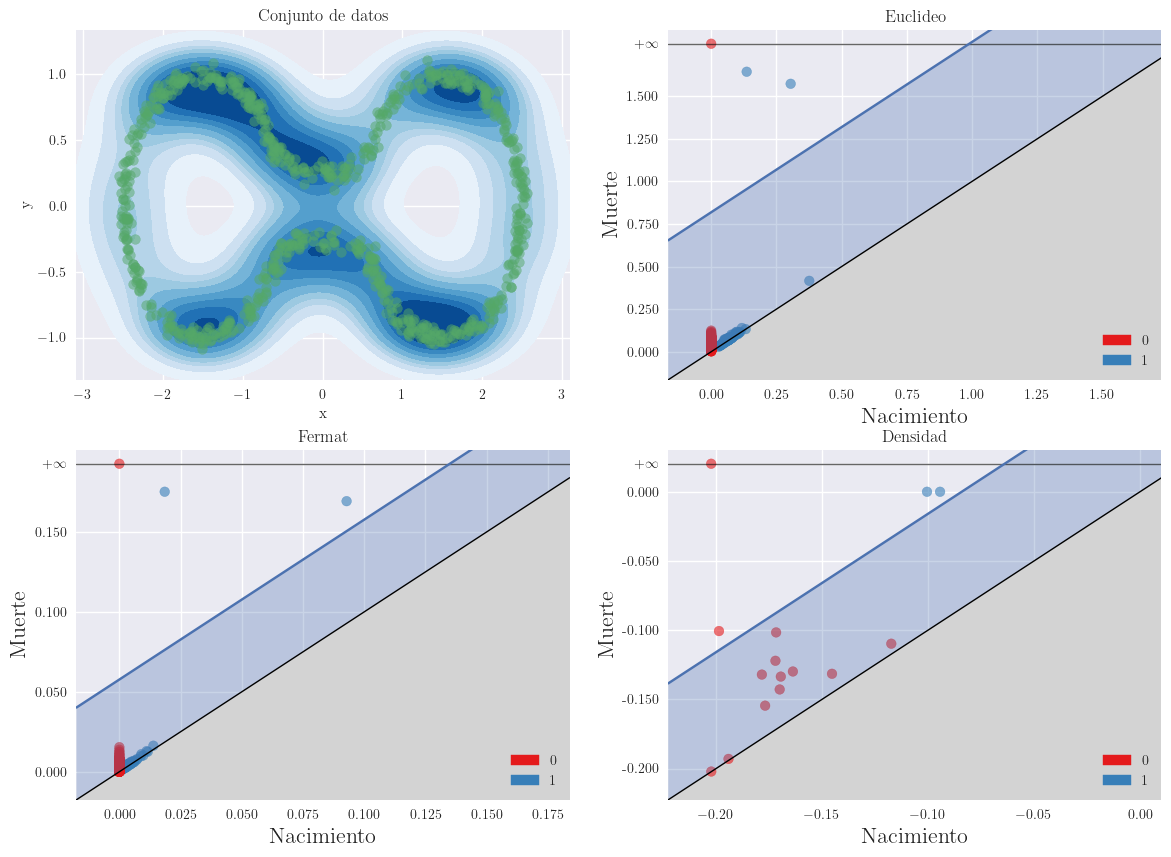

In [71]:
eyeglasses_noise_factory = compose(partial(add_noise, sd=sd), eyeglasses_factory)
eyeglasses_noise_results = run_all(eyeglasses_noise_factory, h=h, B_power=B, robust_quantile=robust_quantile)
eyeglasses_noise_results.powers

## Outliers

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                     5      16.666667
         1                    25      83.333333
         2                     0       0.000000
Fermat   0                     0       0.000000
         1                    23      76.666667
         2                     7      23.333333
KDE      0                     2       6.666667
         1                     2       6.666667
         2                    26      86.666667

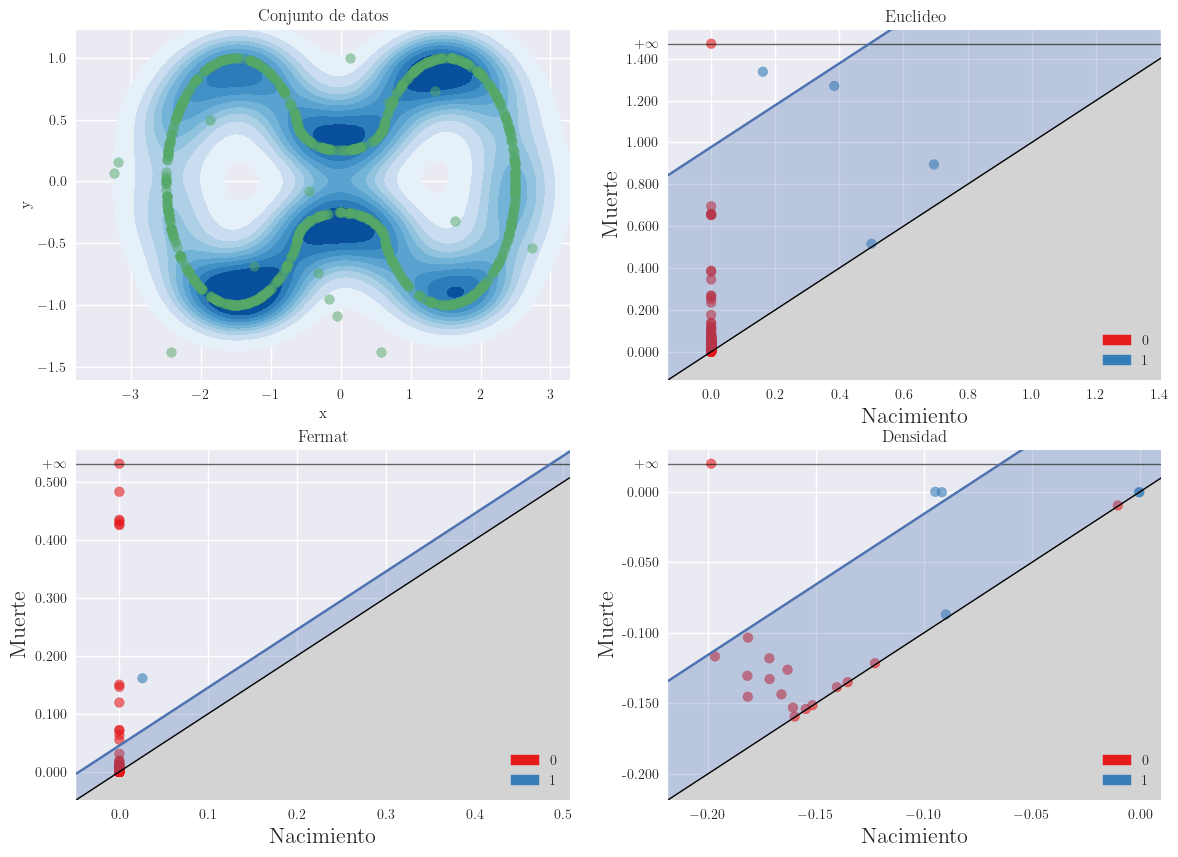

In [72]:
eyeglasses_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    eyeglasses_factory
)
eyeglasses_outliers_results = run_all(eyeglasses_outliers_factory, h=h, B_power=B, robust_quantile=robust_quantile)
eyeglasses_outliers_results.powers

# Filled circle

In [73]:
n = 750
r_power = 2.6
max_r = 1.5
h = 0.3
B = 30

Starting computing intervals
Intervals found in cache:  True
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                    30     100.000000
         1                     0       0.000000
Fermat   0                    30     100.000000
         1                     0       0.000000
KDE      0                     8      26.666667
         1                    22      73.333333

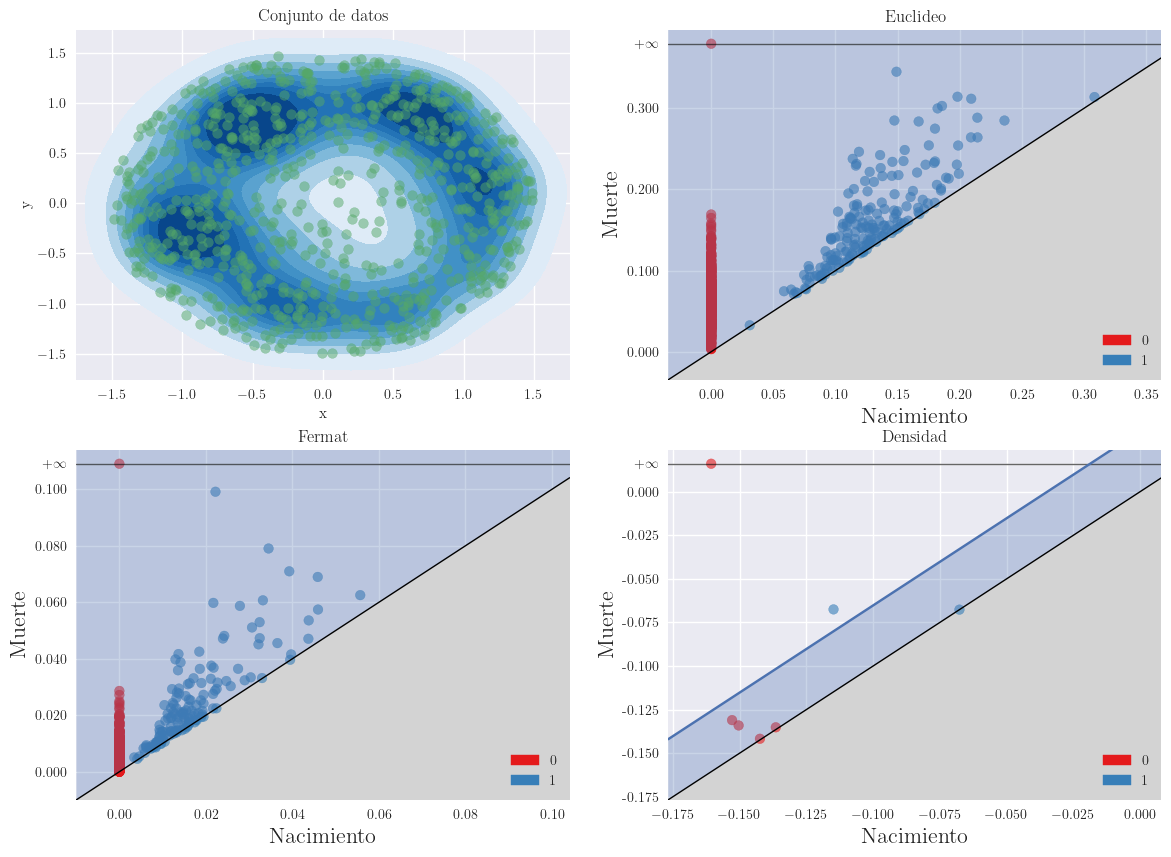

In [74]:
filled_circle_factory = partial(filled_circle, n=n, r_power=r_power, max_r=max_r)
filled_circle_results = run_all(filled_circle_factory, h=h, B_power=B, robust_quantile=robust_quantile)
filled_circle_results.powers